# Estatística Descritiva Aplicada a Dados de Vendas de Supermercado

O objetivo desse projeto é aplicar conceitos de estatística descritiva em uma base de dados de produtos de um supermercado localizado no Chile. Além disso, serão criados gráficos que auxiliam na visualização e discussão dos principais resultados obtidos.

O foco está em explorar as características das categorias de produtos, como média, mediana e desvio padrão, para identificar padrões e possíveis outliers. O projeto está dividido em 6 exercícios, cada um com seu respectivo enunciado e resolução apresentada logo abaixo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/content/base_supermercado.csv')
df.sample(5)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
557,"Cebolla malla 3 un,",Jumbo,1230,0,0,0,verduras
434,Yoghurt light and free vainilla bolsa 900 g,Danone,1749,0,0,0,lacteos
522,Leche semidescremada chocolate Receta original...,Colun,1439,0,0,0,lacteos
371,Arvejas tiernas 400 g,La Crianza,2059,0,0,0,congelados
874,Yoghurt trozos chocolate y almendras 165 g,Soprole,0,725,0,0,lacteos


## Dicionário de Variáveis

O dataframe utilizado neste projeto contém as seguintes colunas:

- **title**: Nome do produto.
- **Marca**: A marca do produto.
- **Preco_Normal**: Preço em que o produto costuma ser vendido quando não há desconto.
- **Preco_Desconto**: Preço do produto após o desconto ser aplicado.
- **Preco_Anterior**: Preço em que o produto era comercializado antes do desconto atual.
- **Desconto**: Total de desconto aplicado.
- **Categoria**: Categoria do produto.

> Observações:
- As entradas que apresentam valores de desconto igual a 0 indicam que o produto não teve desconto aplicado.
- As variáveis categóricas estão em espanhol, conforme a base de dados original.


## Preparação dos dados

In [3]:
# Informações básicas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1107 non-null   object
 1   Marca           1107 non-null   object
 2   Preco_Normal    1107 non-null   int64 
 3   Preco_Desconto  1107 non-null   int64 
 4   Preco_Anterior  1107 non-null   int64 
 5   Desconto        1107 non-null   int64 
 6   Categoria       1107 non-null   object
dtypes: int64(4), object(3)
memory usage: 60.7+ KB


In [4]:
# Padroniza colunas textuais para letras minúsculas
colunas_texto = df.select_dtypes(include=['object']).columns

for coluna in colunas_texto:
    df[coluna] = df[coluna].str.lower()

# Padroniza títulos das colunas para letras minúsculas
df.columns = df.columns.str.lower()

df.head()

,title,marca,preco_normal,preco_desconto,preco_anterior,desconto,categoria
0,"pack 12 un, leche extra proteína 1 l",loncoleche,19788,0,0,0,lacteos
1,"pack 12 un, leche chocolate receta original 1 l",soprole,18228,0,0,0,lacteos
2,"pack 12 un, leche semidescremada chocolate 1 l",soprole,18228,0,0,0,lacteos
3,"pack 12 un, leche semidescremada frutilla 1 l",soprole,18228,0,0,0,lacteos
4,"pack 12 un, leche sin lactosa chocolate 1 l",loncoleche,17988,0,0,0,lacteos


In [5]:
# Verifica dados duplicados
df.duplicated().sum()

np.int64(2)

In [6]:
# Remove dados duplicados
df.drop_duplicates(inplace=True)

# Conferência de dados duplicados
df.duplicated().sum()

np.int64(0)

Após a análise inicial, é possível observar que as colunas **preco_normal** e **preco_anterior** se referem ao mesmo tipo de informação: o valor original do produto antes do desconto. Quando uma dessas colunas contém o valor 0, a outra geralmente apresenta um valor válido, e vice-versa. Mas, existem registros em que **ambas apresentam o valor 0**, o que indica ausência de informação.

Como o valor de venda sem desconto é relevante para a nossa análise, optamos por combinar os dados de ambas as colunas, priorizando os valores válidos. Em seguida, as linhas em que o valor final for igual a 0 serão removidas.

In [7]:
# Quando preco_normal = 0, preenche com valores de preco_anterior
df['preco_normal'] = df['preco_normal'].mask(df['preco_normal'] == 0, df['preco_anterior'])

# Remove dados de preco_normal que sejam iguais a 0
df = df[df['preco_normal'] != 0]

df.sample(5)

,title,marca,preco_normal,preco_desconto,preco_anterior,desconto,categoria
1066,shampoo pro-v restauración 300 ml,pantene,2739,1990,2739,749,belleza-y-cuidado-personal
764,yoghurt triple zero ciruela 120 g,activia,375,0,0,0,lacteos
438,base arvejado 400 g,frutos del maipo,1729,0,0,0,congelados
570,toallas higiénicas naturella cuidado nocturno ...,naturella,1179,0,0,0,belleza-y-cuidado-personal
724,bebida láctea loncoleche shake shake sabor cho...,loncoleche,505,0,0,0,lacteos


In [8]:
# Seleciona colunas que serão utilizadas
df = df[['marca', 'categoria', 'preco_normal', 'desconto']]

df.sample(5)

,marca,categoria,preco_normal,desconto
732,nestlé,lacteos,469,0
276,always,belleza-y-cuidado-personal,2849,0
655,cuisine & co,congelados,819,0
112,rana,comidas-preparadas,4790,0
607,frutas y verduras propias,verduras,990,0


## 1. Traga a média e a mediana dos preços (coluna `preco_normal`) por `categoria` de produto.

Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [9]:
# Cálculo de média e mediana de preco_normal por categoria
media_preco = df.groupby('categoria')['preco_normal'].agg(['mean', 'median']).reset_index()
media_preco['diferenca'] = media_preco['mean'] - media_preco['median']

media_preco.sort_values(by='diferenca')

,categoria,mean,median,diferenca
1,comidas-preparadas,3948.300000,3890.0,58.300000
2,congelados,3190.205357,3029.0,161.205357
6,verduras,1457.135593,1250.0,207.135593
0,belleza-y-cuidado-personal,2985.207447,2694.5,290.707447
4,instantaneos-y-sopas,1179.270270,689.0,490.270270
3,frutas,1724.473684,1195.0,529.473684
5,lacteos,3046.716253,1759.0,1287.716253


Em todas as categorias observa-se que a **média é maior que a mediana**, o que indica uma **distribuição assimétrica à direita**.

A categoria **comidas-preparadas** apresenta a menor diferença entre média e mediana (**58.3**), o que sugere uma **distribuição mais simétrica**.

Por outro lado, a categoria **lácteos** apresenta uma diferença de **1287.7**, que é muito superior à diferença de outras categorias, indicando a presença de **possíveis outliers** nos dados.

As categorias **frutas** e **instantaneos-y-sopas** também apresentam uma diferença elevada, próxima de **500.0**, o que pode indicar uma **distribuição assimétrica**, mas sem valores tão extremos quanto a categoria **lácteos**.


## 2. Traga o desvio padrão por `categoria` de produto.


Qual o comportamento da média e mediana nas categorias com maior desvio?

In [10]:
# Cálculo de desvio padrão de preco_normal por categoria
df.groupby('categoria')['preco_normal'].agg(['mean', 'median', 'std']).reset_index().sort_values(by='std', ascending=False)

,categoria,mean,median,std
5,lacteos,3046.716253,1759.0,4222.268706
0,belleza-y-cuidado-personal,2985.207447,2694.5,1939.140808
2,congelados,3190.205357,3029.0,1810.667464
3,frutas,1724.473684,1195.0,1639.151114
4,instantaneos-y-sopas,1179.270270,689.0,1276.219431
1,comidas-preparadas,3948.300000,3890.0,1252.842025
6,verduras,1457.135593,1250.0,972.230682


O **desvio padrão** que se destaca é o da categoria **lácteos**, com **4222.2**. Esse valor elevado corrobora com a diferença entre **média** e **mediana** observada anteriormente.

Por outro lado, o **menor desvio padrão** foi observado para a categoria **verduras**, com **972.2**. Essa categoria apresentou uma diferença entre **média** e **mediana** próxima de **200**.

## 3. Plote um boxplot da distribuição do `preco_normal` para a `categoria` que você identificou que tem o maior desvio padrão.

Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

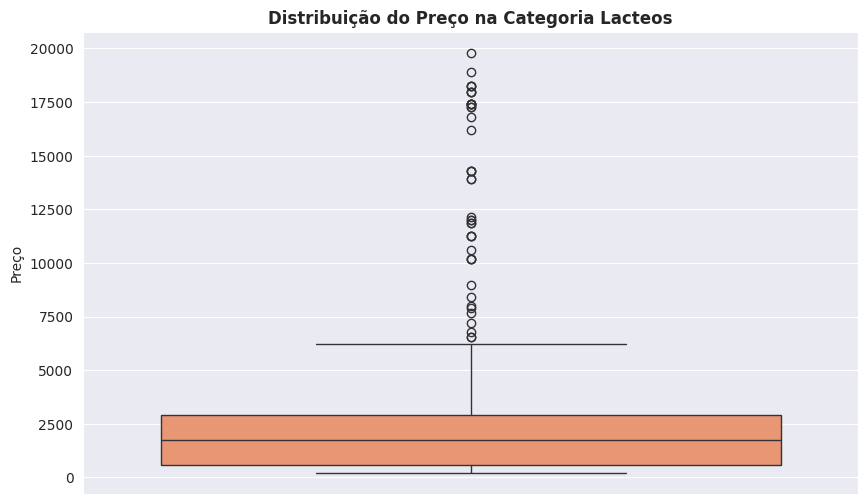

In [11]:
# Box plot da categoria lacteos, que apresentou maior desvio padrão
df_lacteos = df.loc[df['categoria'] == 'lacteos']

plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')

sns.boxplot(data=df_lacteos, y='preco_normal',
            color='#fc8d62', linecolor='#333')

plt.title('Distribuição do Preço na Categoria Lacteos', fontweight='bold')
plt.ylabel('Preço')

plt.show()

Com essa visualização é possível confirmar que a categoria possui muitos outliers, o que está de acordo com a análise anterior (alto desvio padrão e diferença entre média e mediana).

Em uma análise futura, pode ser interessante investigar mais a fundo os **outliers** da variável **preco** para entender melhor o comportamento dos dados em cada **categoria**.

## 4. Plote um gráfico de barras onde temos a média de `descontos` por `categoria`.

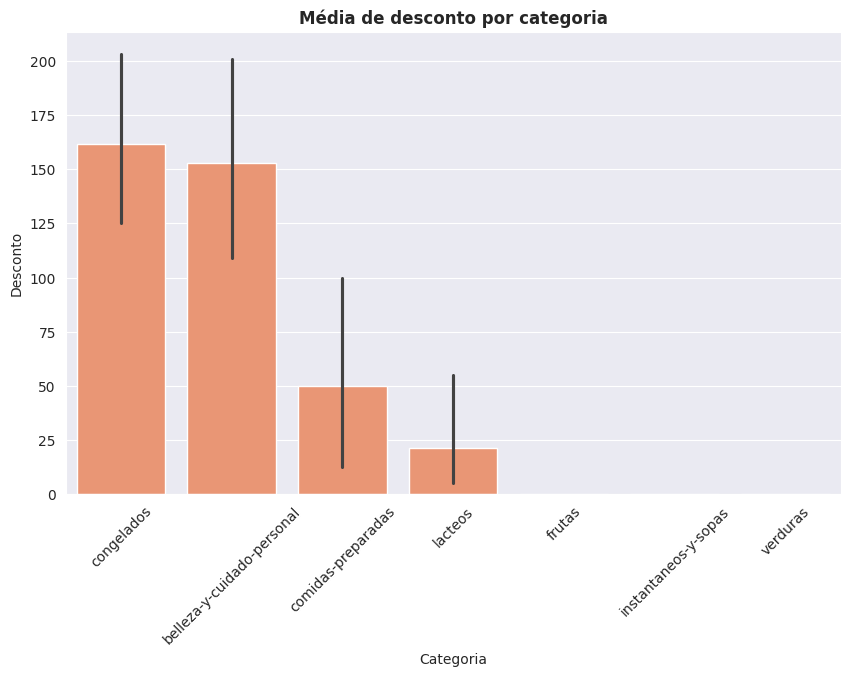

In [12]:
# Gráfico de barras da média de descontos por categoria
order = df.groupby('categoria')['desconto'].mean().sort_values(ascending=False).index

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x='categoria', y='desconto', color='#fc8d62', order=order)

plt.title('Média de desconto por categoria', fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel('Categoria')
plt.ylabel('Desconto')

plt.show()

Com o gráfico, é possível perceber que as categorias **frutas**, **instantaneos-y-sopas** e **verduras** não possuem desconto.

A categoria **lácteos** apresentou a menor média de desconto, enquanto as categorias **congelados** e **belleza-y-cuidado-personal** apresentaram os maiores valores de desconto.

## 5. Plote um gráfico de mapa interativo agrupando os dados por `categoria`, `marca` e trazendo a média de `desconto`.

In [13]:
# Agrupamento da média de desconto por categoria e marca
desconto_agrupado = df.groupby(['categoria', 'marca'])['desconto'].mean().reset_index()

# Gráfico de mapa interativo
fig = px.treemap(desconto_agrupado,
                 path=['categoria', 'marca'],
                 values='desconto',
                 title='Desconto por categoria e marca',
                 color='marca')
# Exibindo o gráfico
fig.show()

Esse mapa interativo permite identificar, de forma hierárquica, quais **categorias** e **marcas** apresentam os maiores **descontos médios**.

Novamente observa-se que as categorias **congelados** e **belleza-y-cuidado-personal** concentram os maiores valores de desconto. A novidade dessa visualização é a possibilidade de **associar as marcas** que contribuem para esses descontos dentro de cada categoria, permitindo uma análise mais detalhada.

Em **belleza-y-cuidado-personal** as marcas que se destacam com maiores médias de desconto são:
- Oral Fresh e variações da marca Rexona.

Já em **congelados** são:
- Magnum e Carte Dor.

## Conclusão

A análise estatística descritiva permitiu identificar assimetrias nos preços por categoria, com destaque para os **lácteos**, que apresentaram alta variação e possível presença de outliers.

Em relação aos descontos, **congelados** e **belleza-y-cuidado-personal** foram as categorias com os maiores valores médios, enquanto outras, como **frutas**, **instantaneos-y-sopas** e **verduras**, não apresentaram desconto.

A visualização de mapa interativo destacou as **marcas responsáveis pelos maiores descontos** em cada categoria, oferecendo uma visão útil para decisões comerciais futuras.